In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
sns.set_style('darkgrid')

In [3]:
df = pd.read_csv('US_WeatherEvents_2016-2019.csv')

In [4]:
df.head()

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
0,W-1,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
1,W-2,Snow,Light,2016-01-07 04:14:00,2016-01-07 04:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
2,W-3,Snow,Light,2016-01-07 05:54:00,2016-01-07 15:34:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
3,W-4,Snow,Light,2016-01-08 05:34:00,2016-01-08 05:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
4,W-5,Snow,Light,2016-01-08 13:54:00,2016-01-08 15:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0


In [5]:
df.describe()

,LocationLat,LocationLng,ZipCode
count,5.059833e+06,5.059833e+06,5.021148e+06
mean,3.882645e+01,-9.203908e+01,5.277158e+04
std,5.489153e+00,1.337799e+01,2.555838e+04
min,2.455710e+01,-1.245550e+02,1.022000e+03
25%,3.460690e+01,-9.800580e+01,3.172100e+04
50%,3.945200e+01,-9.011010e+01,5.450100e+04
75%,4.311110e+01,-8.215590e+01,7.364700e+04
max,4.894020e+01,-6.779280e+01,9.936200e+04


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5059833 entries, 0 to 5059832
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   EventId         object 
 1   Type            object 
 2   Severity        object 
 3   StartTime(UTC)  object 
 4   EndTime(UTC)    object 
 5   TimeZone        object 
 6   AirportCode     object 
 7   LocationLat     float64
 8   LocationLng     float64
 9   City            object 
 10  County          object 
 11  State           object 
 12  ZipCode         float64
dtypes: float64(3), object(10)
memory usage: 501.8+ MB


In [7]:
df.isnull().sum()

EventId               0
Type                  0
Severity              0
StartTime(UTC)        0
EndTime(UTC)          0
TimeZone              0
AirportCode           0
LocationLat           0
LocationLng           0
City               9087
County                0
State                 0
ZipCode           38685
dtype: int64

In [8]:
print(df.Type.unique())
print(df.Severity.unique())
print(len(df.AirportCode.unique()))
print(df.TimeZone.unique())
print(len(df.County.unique()))
print(len(df.State.unique()))

# print(df.EventId.unique())

['Snow' 'Fog' 'Cold' 'Storm' 'Rain' 'Precipitation' 'Hail']
['Light' 'Severe' 'Moderate' 'Heavy' 'UNK' 'Other']
2071
['US/Mountain' 'US/Central' 'US/Eastern' 'US/Pacific']
1100
48


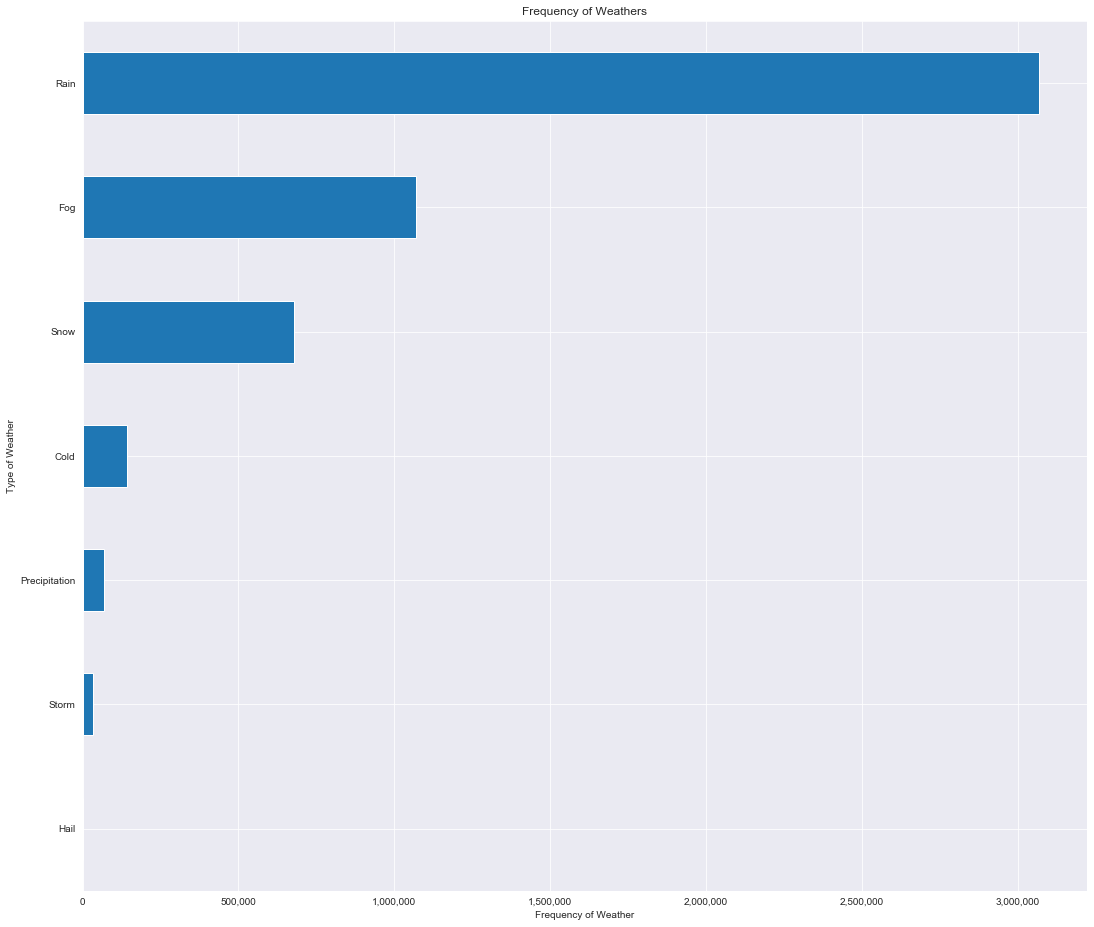

In [9]:
## Plot these for better visualization
weather_type_df = df['Type'].value_counts(ascending=True)

## Some formatting to make it look nicer
fig=plt.figure(figsize=(18, 16))
plt.title("Frequency of Weathers")
plt.xlabel("Frequency of Weather")
plt.ylabel("Type of Weather")
ax = weather_type_df.plot(kind='barh')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

In [10]:
df["StartTime(UTC)"] = pd.to_datetime(df["StartTime(UTC)"], format="%Y-%m-%d %H:%M:%S")
df["Hour"] = df["StartTime(UTC)"].map(lambda x: x.hour)
df["Month"] = df["StartTime(UTC)"].map(lambda x: x.month)
df["Year"] = df["StartTime(UTC)"].map(lambda x: x.year)

In [11]:
weather_categories = df['Type'].value_counts()
weather_category_names = weather_categories.index

In [12]:
def plot_temporal_feature(df, time_feature, weather_category_names, feature, xaxis_formatter=None, xtick_inc=None):
    
    # Set figure size
    fig = plt.figure(figsize=(50, 100))
    
    for i in range(len(weather_category_names)):
        p = plt.subplot(10, 4, i+1)
        weather = weather_category_names[i]
        cur_weather_data = df[df[feature] == weather]
        temporal_data = cur_weather_data[time_feature].value_counts().sort_index()
        sns.lineplot(data=temporal_data)
        if xtick_inc:
            plt.xticks(np.arange(df[time_feature].unique().min(),df[time_feature].unique().max()+1, xtick_inc))
        plt.tick_params(axis = 'both', which = 'major', labelsize = 13)
        if xaxis_formatter:
            p.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: xaxis_formatter(x)))
        plt.ylabel("Frequency of Weather", fontsize=25)
        time_feature_str = str(time_feature).capitalize()
        plt.xlabel(time_feature_str, fontsize=25)
        plt.title("%s (%s)" % (weather, 'per '+ time_feature_str), fontsize=30)

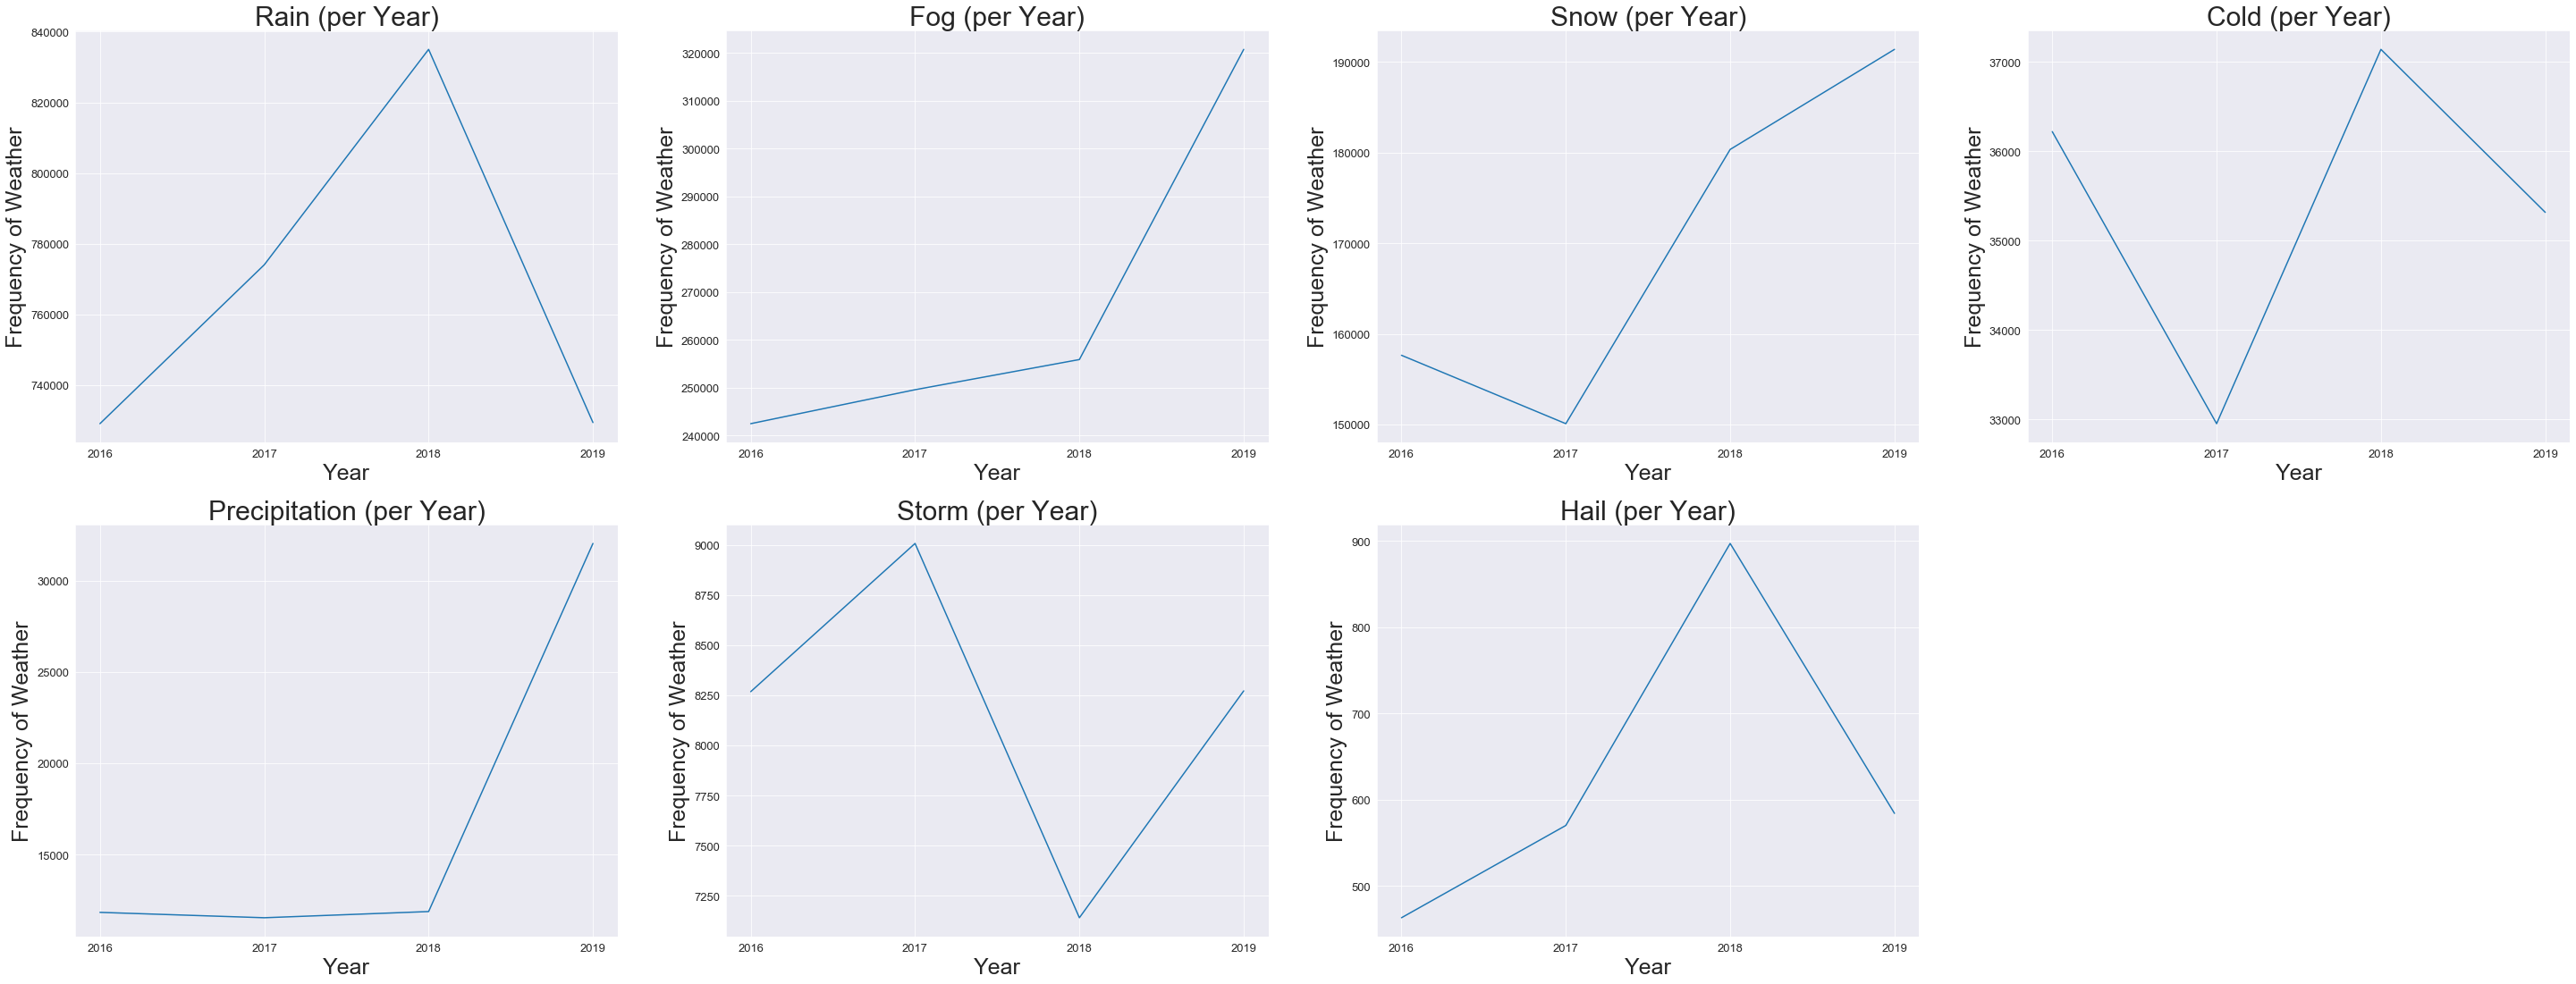

In [13]:
plot_temporal_feature(df, 'Year', weather_category_names, 'Type', xtick_inc=1,)

In [14]:
weather_serverity = df['Severity'].value_counts()
weather_serverity_names = weather_serverity.index

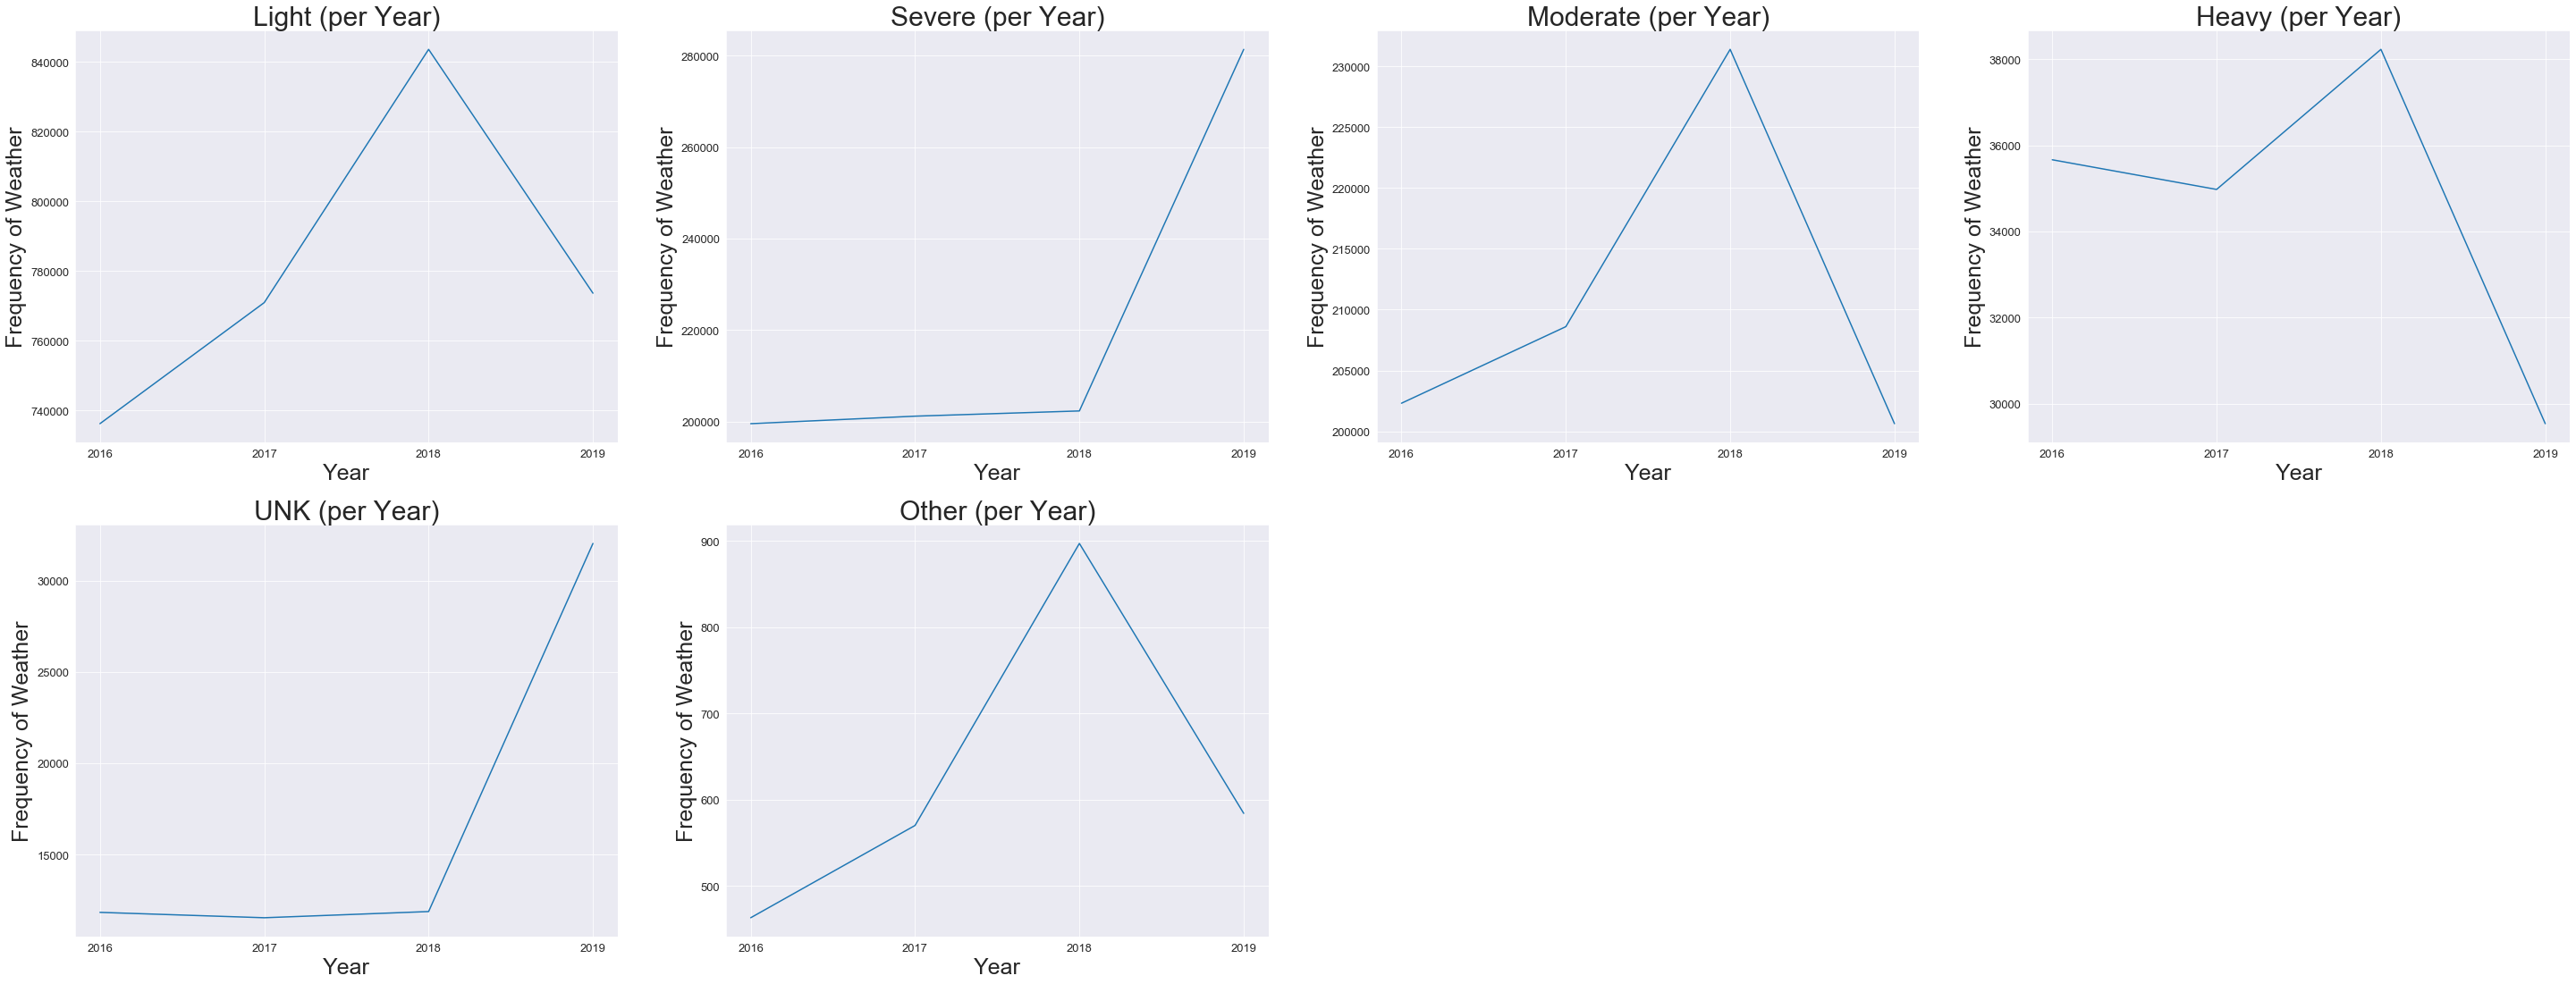

In [15]:
plot_temporal_feature(df, 'Year', weather_serverity_names, 'Severity', xtick_inc=1)

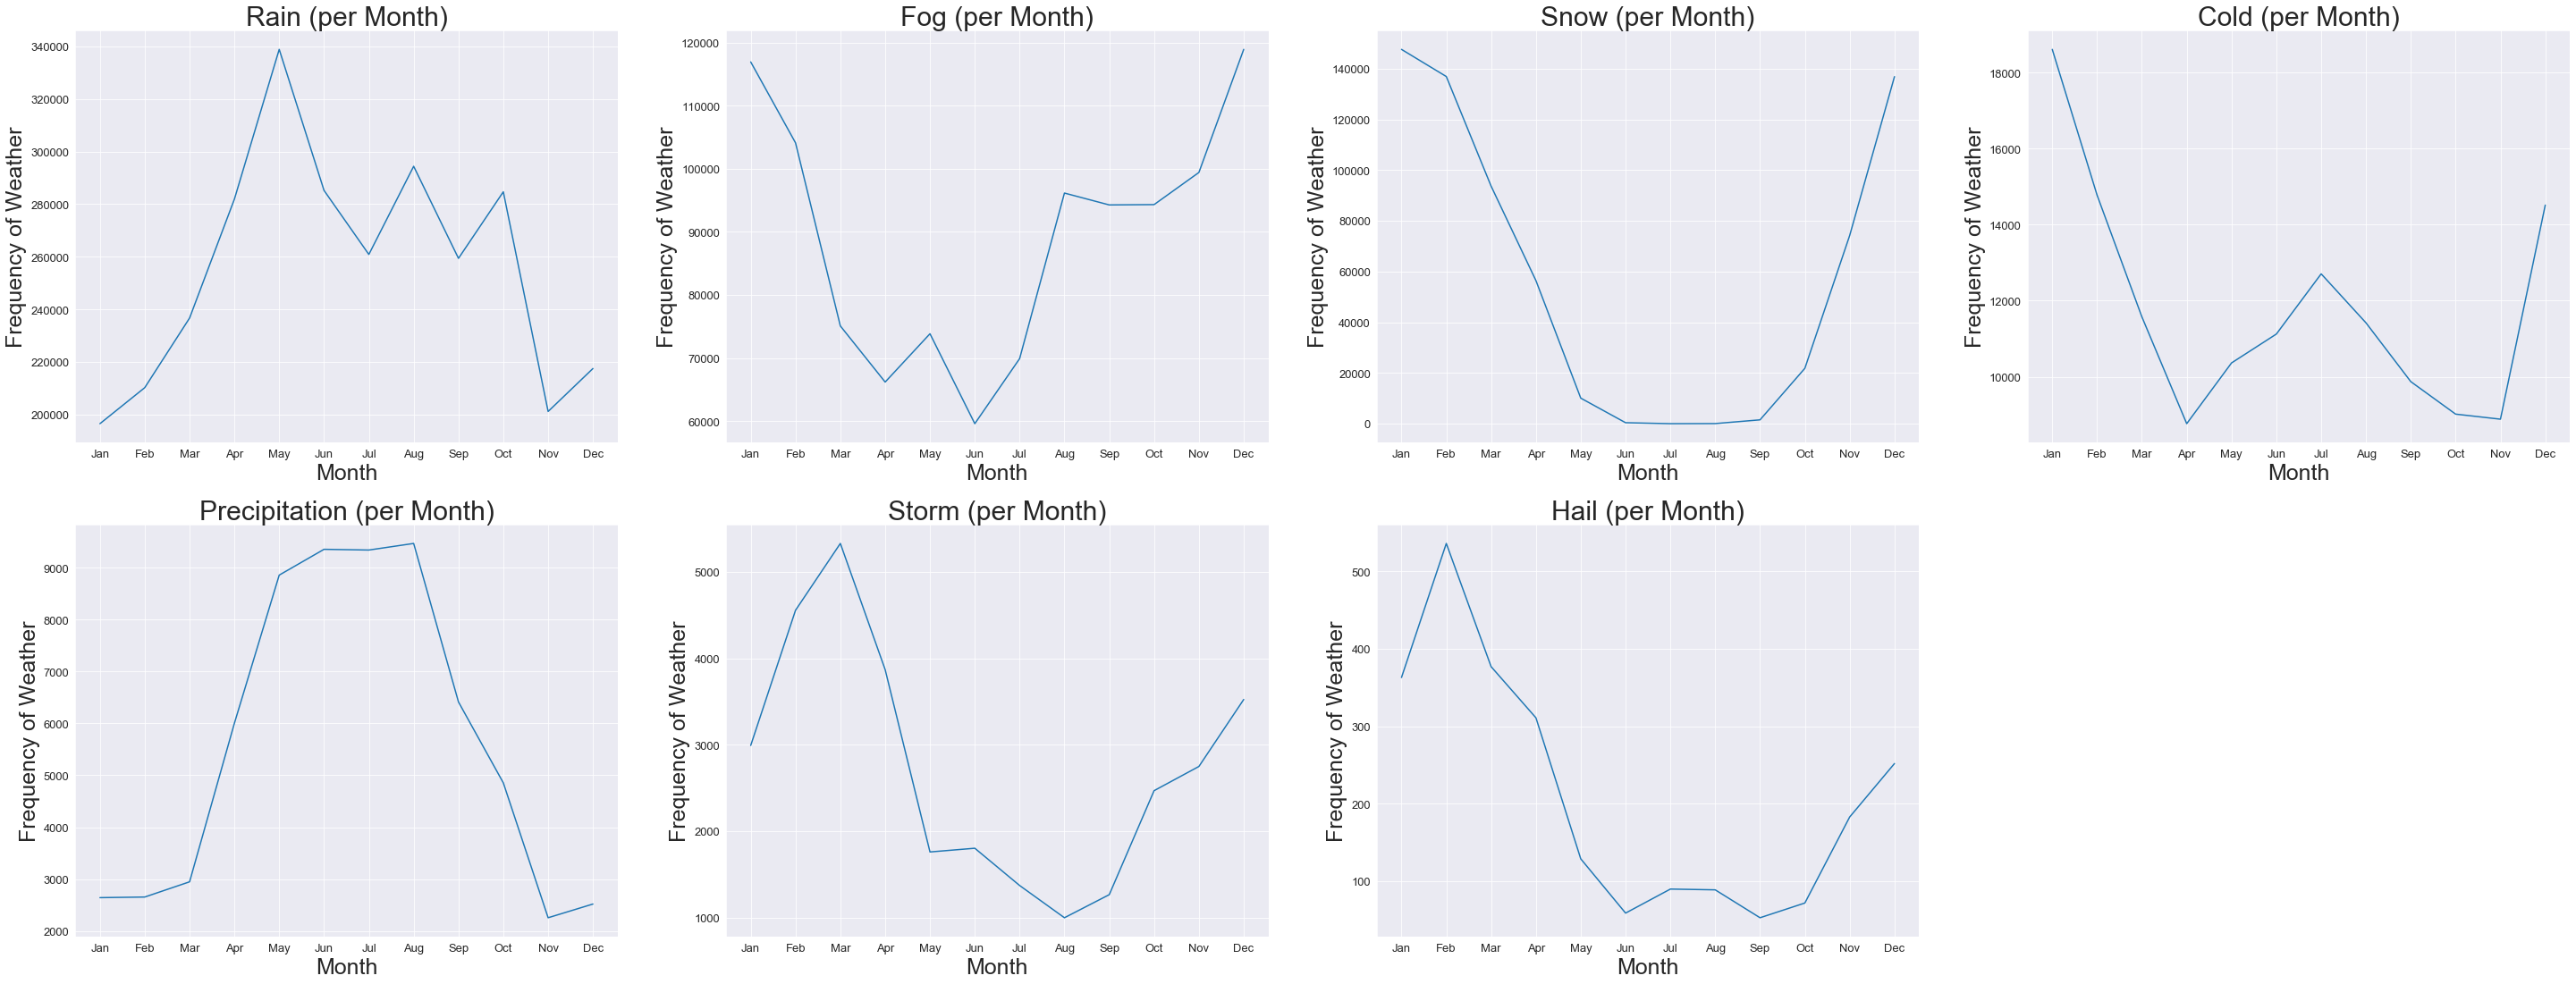

In [16]:
import calendar

def convert_month(num):
    return calendar.month_abbr[num]

plot_temporal_feature(df, 'Month', weather_category_names, 'Type', convert_month, xtick_inc=1)

In [17]:
df.Type = df.Type.astype('category').cat.codes
df.Severity = df.Severity.astype('category').cat.codes

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5059833 entries, 0 to 5059832
Data columns (total 16 columns):
 #   Column          Dtype         
---  ------          -----         
 0   EventId         object        
 1   Type            int8          
 2   Severity        int8          
 3   StartTime(UTC)  datetime64[ns]
 4   EndTime(UTC)    object        
 5   TimeZone        object        
 6   AirportCode     object        
 7   LocationLat     float64       
 8   LocationLng     float64       
 9   City            object        
 10  County          object        
 11  State           object        
 12  ZipCode         float64       
 13  Hour            int64         
 14  Month           int64         
 15  Year            int64         
dtypes: datetime64[ns](1), float64(3), int64(3), int8(2), object(7)
memory usage: 550.1+ MB


In [19]:
df.drop(['ZipCode', 'City', 'LocationLat', 'LocationLng', 'EventId', 'TimeZone'], axis=1, inplace=True)

In [20]:
df.head()

,Type,Severity,StartTime(UTC),EndTime(UTC),AirportCode,County,State,Hour,Month,Year
0,5,1,2016-01-06 23:14:00,2016-01-07 00:34:00,K04V,Saguache,CO,23,1,2016
1,5,1,2016-01-07 04:14:00,2016-01-07 04:54:00,K04V,Saguache,CO,4,1,2016
2,5,1,2016-01-07 05:54:00,2016-01-07 15:34:00,K04V,Saguache,CO,5,1,2016
3,5,1,2016-01-08 05:34:00,2016-01-08 05:54:00,K04V,Saguache,CO,5,1,2016
4,5,1,2016-01-08 13:54:00,2016-01-08 15:54:00,K04V,Saguache,CO,13,1,2016


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5059833 entries, 0 to 5059832
Data columns (total 10 columns):
 #   Column          Dtype         
---  ------          -----         
 0   Type            int8          
 1   Severity        int8          
 2   StartTime(UTC)  datetime64[ns]
 3   EndTime(UTC)    object        
 4   AirportCode     object        
 5   County          object        
 6   State           object        
 7   Hour            int64         
 8   Month           int64         
 9   Year            int64         
dtypes: datetime64[ns](1), int64(3), int8(2), object(4)
memory usage: 318.5+ MB
